In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,  QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/new thesis/Thesis/Epileptic Seizure Recognition.csv')

Mounted at /content/drive


In [3]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
df=df.drop('Unnamed', axis=1)

In [5]:
temp_df = df.copy()

In [6]:
df['y']=np.where(df['y'] >1, 0,  1)


In [7]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [8]:
df.y.value_counts()


0    9200
1    2300
Name: y, dtype: int64

In [9]:
print(df.isna().sum())

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64


In [10]:
X=df.drop('y', axis=1).columns


In [11]:
log_columns = df[X].skew().sort_values(ascending=False)
to_log = log_columns.loc[log_columns > 0.75]

In [12]:
len(to_log)

0

# Dimension Reduction

In [13]:
X=df.drop('y', axis=1)
y=df.y

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [15]:
train_idx, test_idx = next(split.split(X, y))


In [16]:
X_train = df.loc[train_idx, X.columns.values]
y_train = df.loc[train_idx, 'y']
X_test = df.loc[test_idx, X.columns.values]
y_test = df.loc[test_idx, 'y']



In [17]:
classifiers = [
    LogisticRegression(),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier()]

In [18]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    
    # calculate score
    acc = accuracy_score(y_test, train_predictions)
    precision = precision_score(y_test, train_predictions, average = 'macro') 
    recall = recall_score(y_test, train_predictions, average = 'macro') 
    f_score = f1_score(y_test, train_predictions, average = 'macro')
    
    print("Precision: {:.4%}".format(precision))
    print("Recall: {:.4%}".format(recall))
    print("F-score: {:.4%}".format(recall))
    print("Accuracy: {:.4%}".format(acc))
    
print("="*30)

LogisticRegression
****Results****
Precision: 52.8983%
Recall: 53.9130%
F-score: 53.9130%
Accuracy: 63.5652%
SVC
****Results****
Precision: 94.3870%
Recall: 90.3261%
F-score: 90.3261%
Accuracy: 95.2174%
DecisionTreeClassifier
****Results****
Precision: 90.9601%
Recall: 90.6250%
F-score: 90.6250%
Accuracy: 94.1304%
RandomForestClassifier
****Results****
Precision: 96.5443%
Recall: 96.0870%
F-score: 96.0870%
Accuracy: 97.6522%
GradientBoostingClassifier
****Results****
Precision: 95.9919%
Recall: 92.8261%
F-score: 92.8261%
Accuracy: 96.4783%
MLPClassifier
****Results****
Precision: 77.1441%
Recall: 81.9565%
F-score: 81.9565%
Accuracy: 85.3478%


In [19]:
lst = list()
feature_weight_list = list()

In [20]:
def find_PCA_df(df, features):
    for n in range(2, features):


        PCAmod = PCA(n_components=n)
        PCAmod.fit(df)


        lst.append(pd.Series({'n':n, 'model':PCAmod,
                                   'var': PCAmod.explained_variance_ratio_.sum()}))


        abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
        feature_weight_list.append(pd.DataFrame({'n':n, 
                                                 'features': df.columns,
                                                 'values':abs_feature_values/abs_feature_values.sum()}))

    return pd.concat(lst, axis=1).T.set_index('n')


In [21]:
pca_df = find_PCA_df(df,30)
print (pca_df)

                   model       var
n                                 
2    PCA(n_components=2)  0.108429
3    PCA(n_components=3)  0.157958
4    PCA(n_components=4)  0.206197
5    PCA(n_components=5)  0.250641
6    PCA(n_components=6)  0.292092
7    PCA(n_components=7)  0.332744
8    PCA(n_components=8)  0.371981
9    PCA(n_components=9)    0.4082
10  PCA(n_components=10)   0.44266
11  PCA(n_components=11)  0.475622
12  PCA(n_components=12)  0.508028
13  PCA(n_components=13)  0.537688
14  PCA(n_components=14)  0.566859
15  PCA(n_components=15)  0.592545
16  PCA(n_components=16)  0.616377
17  PCA(n_components=17)  0.637931
18  PCA(n_components=18)  0.657592
19  PCA(n_components=19)  0.678224
20  PCA(n_components=20)  0.697707
21  PCA(n_components=21)  0.717143
22  PCA(n_components=22)  0.735663
23  PCA(n_components=23)  0.753139
24  PCA(n_components=24)  0.770688
25  PCA(n_components=25)   0.78706
26  PCA(n_components=26)  0.803558
27  PCA(n_components=27)  0.818515
28  PCA(n_components

In [22]:
pca_df['factors']=pca_df.index
pca_df['var'] = pd.to_numeric(pca_df['var'], errors='coerce')

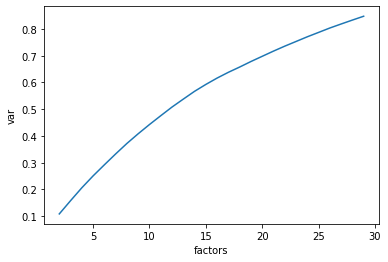

In [23]:
sn.lineplot(data=pca_df, x='factors', y='var')

In [24]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [31]:
def get_avg_score(n):
    pipe = [
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', RandomForestClassifier())
    ]
    pipe = Pipeline(pipe)
    f1_scores = []
    for train_index, test_index in split.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        f1_scores.append(f1_score(y_test, pipe.predict(X_test)))
    return np.mean(f1_scores)

In [32]:
ns = [5, 10, 20, 30, 40, 50, 100]
score_list = [get_avg_score(n) for n in ns]
print(score_list)

[0.8944504896626768, 0.9192680301399354, 0.9336188436830835, 0.9370932754880694, 0.9341963322545845, 0.935483870967742, 0.9395248380129588]


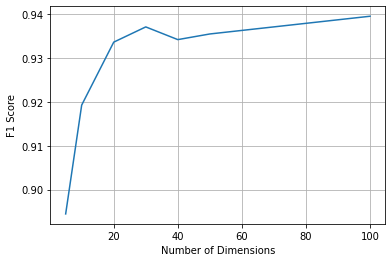

In [33]:
ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='F1 Score')
ax.grid(True)

In [34]:
from sklearn.cluster import KMeans
kmeans_list = list()


In [35]:
for clusters in range(1,15):
    km = KMeans(n_clusters=clusters, random_state=42)
    km = km.fit(df[df.drop('y', axis=1).columns])
    
    kmeans_list.append(pd.Series({'clusters': clusters, 
                              'inertia': km.inertia_,
                              'model': km}))
# Prepare to plot    
elbow_graph_data = (pd.concat(kmeans_list, axis=1)
             .T
             [['clusters','inertia']])
elbow_graph_data[['clusters','inertia']]=elbow_graph_data[['clusters','inertia']].apply(pd.to_numeric, errors='coerce')

<AxesSubplot:xlabel='clusters', ylabel='inertia'>

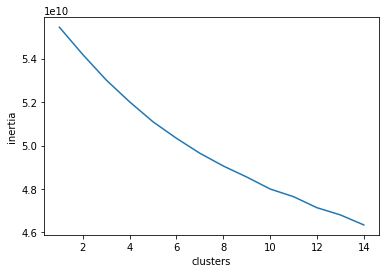

In [ ]:
sn.lineplot(data=elbow_graph_data, x='clusters', y='inertia')


In [ ]:
km = KMeans(n_clusters=5, random_state=42)
km = km.fit(df[df.drop('y', axis=1).columns])

In [ ]:
df['km_cluster'] = km.predict(df[df.drop('y', axis=1).columns])


In [ ]:
from sklearn.cluster import AgglomerativeClustering
AClust = AgglomerativeClustering(n_clusters=5, linkage='ward')
AClust = AClust.fit(df[df.drop('y', axis=1).columns])
df['AClust'] = AClust.fit_predict(df[df.drop('y', axis=1).columns])

In [ ]:
data_KM=df.drop(['AClust'], axis=1)
data_AG=df.drop(['km_cluster'], axis=1)
data_no_clusters=df.drop(['AClust', 'km_cluster'], axis=1)

In [ ]:
def test_clusters(estimator, X, y):
    f1_scores = []
    for train_index, test_index in split.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        estimator.fit(X_train, y_train)
        f1_scores.append(f1_score(y_test, estimator.predict(X_test)))
    return np.mean(f1_scores)

In [ ]:
f1_with_kmeans = test_clusters(RandomForestClassifier(), data_KM, y)
f1_with_hierarchial = test_clusters(RandomForestClassifier(), data_AG, y)
f1_with_no_clustering = test_clusters(RandomForestClassifier(), data_no_clusters, y)

In [ ]:
print('F1 score with K-means clustering:', f1_with_kmeans)
print('F1 score with hierarchial clustering:', f1_with_hierarchial)
print('F1 score with no clustering:', f1_with_no_clustering)

F1 score with K-means clustering: 1.0
F1 score with hierarchial clustering: 0.9978308026030369
F1 score with no clustering: 1.0
